In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

sns.set_theme(font_scale=1.5, style="darkgrid")

# Load DB

In [2]:
cnx = sqlite3.connect('olist.db')

sql_query = """
    SELECT name FROM sqlite_master
    WHERE type='table';
"""

list_tables = pd.read_sql_query(sql_query, cnx)
list_tables

,name
0,olist_order_customer_dataset
1,olist_order_dataset
2,olist_order_reviews_dataset
3,olist_order_payments_dataset
4,olist_order_items_dataset
5,olist_products_dataset
6,olist_sellers_dataset
7,olist_geolocation_dataset
8,product_category_name_translation


In [3]:
df_customer = pd.read_sql_query("""select * from olist_order_customer_dataset""", cnx)
df_order = pd.read_sql_query("""select * from olist_order_dataset""", cnx)
df_payments = pd.read_sql_query("""select * from olist_order_payments_dataset""", cnx)
df_order_items = pd.read_sql_query("""select * from olist_order_items_dataset""", cnx)
df_products = pd.read_sql_query("""select * from olist_products_dataset""", cnx)
df_sellers = pd.read_sql_query("""select * from olist_sellers_dataset""", cnx)
df_geolocation = pd.read_sql_query("""select * from olist_geolocation_dataset""", cnx)
df_product_category = pd.read_sql_query("""select * from product_category_name_translation""", cnx)

# Data Preps
## Merging Dataset

In [4]:
df_order.drop('index',axis=1,inplace=True)

In [5]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     99441 non-null  int64 
 1   customer_id               99441 non-null  object
 2   customer_unique_id        99441 non-null  object
 3   customer_zip_code_prefix  99441 non-null  int64 
 4   customer_city             99441 non-null  object
 5   customer_state            99441 non-null  object
dtypes: int64(2), object(4)
memory usage: 4.6+ MB


In [6]:
df = df_order.set_index('customer_id').join(df_customer.set_index('customer_id')).set_index('order_id')
df = df.drop('index',axis=1).join(df_order_items.set_index('order_id'))
df.head()

,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,index,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
order_id,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,0.0,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
00018f77f2f0320c557190d7a144bdd3,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,1.0,1.0,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
000229ec398224ef6ca0657da4fc703e,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,2.0,1.0,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
00024acbcdf0a6daa1e931b038114c75,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,3.0,1.0,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
00042b26cf59d7ce69dfabb4e55b4fd9,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,4.0,1.0,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113425 entries, 00010242fe8c5a6d1ba2dd792cb16214 to fffe41c64501cc87c801fd61db3f6244
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_status                   113425 non-null  object 
 1   order_purchase_timestamp       113425 non-null  object 
 2   order_approved_at              113264 non-null  object 
 3   order_delivered_carrier_date   111457 non-null  object 
 4   order_delivered_customer_date  110196 non-null  object 
 5   order_estimated_delivery_date  113425 non-null  object 
 6   customer_unique_id             113425 non-null  object 
 7   customer_zip_code_prefix       113425 non-null  int64  
 8   customer_city                  113425 non-null  object 
 9   customer_state                 113425 non-null  object 
 10  index                          112650 non-null  float64
 11  order_item_id                  112650 n

In [8]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])
df.drop(['index'], axis=1, inplace=True)

In [9]:
df['customer_zip_code_prefix'] = df['customer_zip_code_prefix'].astype('str')
df['order_item_id'] = df['order_item_id'].astype('str')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113425 entries, 00010242fe8c5a6d1ba2dd792cb16214 to fffe41c64501cc87c801fd61db3f6244
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_status                   113425 non-null  object        
 1   order_purchase_timestamp       113425 non-null  datetime64[ns]
 2   order_approved_at              113264 non-null  datetime64[ns]
 3   order_delivered_carrier_date   111457 non-null  datetime64[ns]
 4   order_delivered_customer_date  110196 non-null  datetime64[ns]
 5   order_estimated_delivery_date  113425 non-null  datetime64[ns]
 6   customer_unique_id             113425 non-null  object        
 7   customer_zip_code_prefix       113425 non-null  object        
 8   customer_city                  113425 non-null  object        
 9   customer_state                 113425 non-null  object        
 10  order_item_id   

In [11]:
df = df.reset_index().set_index('product_id').join(df_products.set_index('product_id').drop('index', axis=1))

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113425 entries, 00066f42aeeb9f3007548bb9d3f33c38 to nan
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113425 non-null  object        
 1   order_status                   113425 non-null  object        
 2   order_purchase_timestamp       113425 non-null  datetime64[ns]
 3   order_approved_at              113264 non-null  datetime64[ns]
 4   order_delivered_carrier_date   111457 non-null  datetime64[ns]
 5   order_delivered_customer_date  110196 non-null  datetime64[ns]
 6   order_estimated_delivery_date  113425 non-null  datetime64[ns]
 7   customer_unique_id             113425 non-null  object        
 8   customer_zip_code_prefix       113425 non-null  object        
 9   customer_city                  113425 non-null  object        
 10  customer_state                 113425 non-nul

In [13]:
df = df.reset_index().set_index('order_id').reset_index()
df.head()

,order_id,product_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,f30149f4a8882a08895b6a242aa0d612,00066f42aeeb9f3007548bb9d3f33c38,delivered,2018-05-20 18:45:21,2018-05-20 18:58:59,2018-05-21 16:09:00,2018-06-06 22:11:56,2018-06-20,cd929c5ecff5fc60e9d808d33702e434,95890,...,101.65,18.59,perfumaria,53.0,596.0,6.0,300.0,20.0,16.0,16.0
1,f5eda0ded77c1293b04c953138c8331d,00088930e925c41fd95ebfe695fd2655,delivered,2017-12-12 19:20:28,2017-12-12 19:32:19,2017-12-20 20:12:42,2017-12-23 17:11:51,2018-01-05,cbbeff6b693e69511cf9d059f4b71036,14403,...,129.90,13.93,automotivo,56.0,752.0,4.0,1225.0,55.0,10.0,26.0
2,0bf736fd0fd5169d60de3699fcbcf986,0009406fd7479715e4bef61dd91f2462,delivered,2017-12-21 16:21:47,2017-12-22 17:31:27,2018-01-02 22:27:47,2018-01-06 15:03:41,2018-01-16,f51fb63558e88eb3373773d106fa6880,2883,...,229.00,13.10,cama_mesa_banho,50.0,266.0,2.0,300.0,45.0,15.0,35.0
3,3aba44d8e554ab4bb8c09f6f78032ca8,000b8f95fcb9e0096488278317764d19,delivered,2018-08-10 13:24:35,2018-08-10 13:35:21,2018-08-13 14:43:00,2018-08-17 21:33:40,2018-08-27,4e32da06df703a2561f63e75b13f6260,95174,...,58.90,19.60,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0
4,6f0dfb5b5398b271cc6bbd9ee263530e,000b8f95fcb9e0096488278317764d19,delivered,2018-08-01 22:00:33,2018-08-01 22:15:19,2018-08-02 14:20:00,2018-08-07 17:38:52,2018-08-24,7f2dfd48dba158dbf61ba2ea631d93df,93530,...,58.90,19.60,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0


In [14]:
df_ = df[[
    'order_id', 
    'order_status', 
    'order_purchase_timestamp', 
    'order_approved_at', 
    'order_delivered_carrier_date', 
    'order_delivered_customer_date', 
    'order_estimated_delivery_date',
    'seller_id',
    'customer_unique_id',
    'customer_city',
    'customer_state',
    'product_category_name',
    'price',
    'freight_value'
]]
df_.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,customer_unique_id,customer_city,customer_state,product_category_name,price,freight_value
0,f30149f4a8882a08895b6a242aa0d612,delivered,2018-05-20 18:45:21,2018-05-20 18:58:59,2018-05-21 16:09:00,2018-06-06 22:11:56,2018-06-20,5670f4db5b62c43d542e1b2d56b0cf7c,cd929c5ecff5fc60e9d808d33702e434,teutonia,RS,perfumaria,101.65,18.59
1,f5eda0ded77c1293b04c953138c8331d,delivered,2017-12-12 19:20:28,2017-12-12 19:32:19,2017-12-20 20:12:42,2017-12-23 17:11:51,2018-01-05,7142540dd4c91e2237acb7e911c4eba2,cbbeff6b693e69511cf9d059f4b71036,franca,SP,automotivo,129.90,13.93
2,0bf736fd0fd5169d60de3699fcbcf986,delivered,2017-12-21 16:21:47,2017-12-22 17:31:27,2018-01-02 22:27:47,2018-01-06 15:03:41,2018-01-16,4a3ca9315b744ce9f8e9374361493884,f51fb63558e88eb3373773d106fa6880,sao paulo,SP,cama_mesa_banho,229.00,13.10
3,3aba44d8e554ab4bb8c09f6f78032ca8,delivered,2018-08-10 13:24:35,2018-08-10 13:35:21,2018-08-13 14:43:00,2018-08-17 21:33:40,2018-08-27,40ec8ab6cdafbcc4f544da38c67da39a,4e32da06df703a2561f63e75b13f6260,farroupilha,RS,utilidades_domesticas,58.90,19.60
4,6f0dfb5b5398b271cc6bbd9ee263530e,delivered,2018-08-01 22:00:33,2018-08-01 22:15:19,2018-08-02 14:20:00,2018-08-07 17:38:52,2018-08-24,40ec8ab6cdafbcc4f544da38c67da39a,7f2dfd48dba158dbf61ba2ea631d93df,novo hamburgo,RS,utilidades_domesticas,58.90,19.60


## Identifikasi NaN

In [15]:
_ = df_.isna().sum()/df_.shape[0]
pd.DataFrame({
    'Columns':_.index,
    'Perc':_.values
})

,Columns,Perc
0,order_id,0.000000
1,order_status,0.000000
2,order_purchase_timestamp,0.000000
3,order_approved_at,0.001419
4,order_delivered_carrier_date,0.017351
5,order_delivered_customer_date,0.028468
6,order_estimated_delivery_date,0.000000
7,seller_id,0.006833
8,customer_unique_id,0.000000
9,customer_city,0.000000


In [16]:
df_['price'].fillna(df_['price'].median(), inplace=True)
df_['freight_value'].fillna(df_['freight_value'].median(), inplace=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_30808\52508255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['price'].fillna(df_['price'].median(), inplace=True)
C:\Users\asus\AppData\Local\Temp\ipykernel_30808\52508255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['freight_value'].fillna(df_['freight_value'].median(), inplace=True)


In [17]:
df_[df_.duplicated()]

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,customer_unique_id,customer_city,customer_state,product_category_name,price,freight_value
13,c432657bb18ddf7f48b7227db09048d4,delivered,2017-12-12 00:29:08,2017-12-12 01:31:21,2017-12-12 21:21:52,2017-12-22 17:28:04,2018-01-11,8b321bb669392f5163d04c59e235e066,e890c412a8b910d4709660658d700483,mineiros,GO,consoles_games,38.90,16.11
16,dd436680fbd2d38edb26277f5b8379dc,delivered,2017-12-25 15:00:28,2017-12-25 15:30:50,2017-12-28 15:47:24,2017-12-29 16:57:08,2018-01-15,8b321bb669392f5163d04c59e235e066,ac7cbcc0c3a162e01f6e6d76b2bd6039,sao paulo,SP,consoles_games,38.90,9.34
30,c214276ccd69c3953f880b487209f47e,delivered,2017-07-08 15:28:20,2017-07-08 15:43:15,2017-07-10 17:37:50,2017-07-11 12:37:18,2017-07-21,8a32e327fe2c1b3511609d81aaf9f042,d8670b3aea02d9a40030c0d8ab6e72b5,sao paulo,SP,moveis_decoracao,34.99,7.78
32,ce76ffbfb04b7dc8293ca658f75963cc,delivered,2017-02-15 23:49:35,2017-02-16 00:43:42,2017-02-16 15:16:51,2017-02-23 13:16:32,2017-03-20,8a32e327fe2c1b3511609d81aaf9f042,8c5ff160a30c0aa25516abd1d185e9c3,campo bom,RS,moveis_decoracao,34.99,16.05
37,2d8e71bf7d31a41d40f122c8173fdf06,delivered,2017-06-01 16:05:36,2017-06-03 02:25:25,2017-06-05 15:59:55,2017-06-09 12:13:40,2017-06-28,e9779976487b77c6d4ac45f75ec7afe9,3f36fa15a16c4850992aa0f33561906e,brasilia,DF,beleza_saude,32.98,15.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112625,808b7fff91e537a5df90717957ee5bb1,delivered,2018-06-05 19:00:39,2018-06-05 19:54:42,2018-06-06 14:11:00,2018-06-08 17:36:49,2018-07-19,113e3a788b935f48aad63e1c41dac1bd,7e14aadc62265635e984db6740558a9e,nova iguacu,RJ,artigos_de_natal,31.78,18.23
112632,be48bdef069ed1eb0d320bfe65d26351,delivered,2017-12-02 19:41:11,2017-12-02 19:53:44,2017-12-05 14:59:29,2017-12-10 12:19:04,2017-12-27,08d2d642cf72b622b14dde1d2f5eb2f5,0825dca27a94ec57277c16731af8163f,sao paulo,SP,papelaria,7.50,12.69
112634,f179e0782e0180bc2ec9ce167d4cf245,delivered,2017-12-05 09:03:19,2017-12-06 02:35:39,2017-12-11 12:49:54,2017-12-20 15:39:10,2017-12-29,08d2d642cf72b622b14dde1d2f5eb2f5,d6699b457652e531b12f4c6a9fd44e00,belo horizonte,MG,papelaria,7.50,16.11
112635,f179e0782e0180bc2ec9ce167d4cf245,delivered,2017-12-05 09:03:19,2017-12-06 02:35:39,2017-12-11 12:49:54,2017-12-20 15:39:10,2017-12-29,08d2d642cf72b622b14dde1d2f5eb2f5,d6699b457652e531b12f4c6a9fd44e00,belo horizonte,MG,papelaria,7.50,16.11


In [18]:
df_.drop_duplicates(keep='first', inplace=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_30808\3919476665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_.drop_duplicates(keep='first', inplace=True)


In [19]:
df.describe()

,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,112650.000000,112650.000000,111047.000000,111047.000000,111047.000000,112632.000000,112632.000000,112632.000000,112632.000000
mean,120.653739,19.990320,48.775978,787.867029,2.209713,2093.672047,30.153669,16.593766,22.996546
std,183.633928,15.806405,10.025581,652.135608,1.721438,3751.596884,16.153449,13.443483,11.707268
min,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,39.900000,13.080000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,74.990000,16.260000,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,134.900000,21.150000,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [20]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102392 entries, 0 to 113424
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       102392 non-null  object        
 1   order_status                   102392 non-null  object        
 2   order_purchase_timestamp       102392 non-null  datetime64[ns]
 3   order_approved_at              102232 non-null  datetime64[ns]
 4   order_delivered_carrier_date   100594 non-null  datetime64[ns]
 5   order_delivered_customer_date  99399 non-null   datetime64[ns]
 6   order_estimated_delivery_date  102392 non-null  datetime64[ns]
 7   seller_id                      101617 non-null  object        
 8   customer_unique_id             102392 non-null  object        
 9   customer_city                  102392 non-null  object        
 10  customer_state                 102392 non-null  object        
 11  

Terlihat disini masih banyak ```order_delivered_customer_date``` yang nan. mari kita lihat apakah ada hubungan antara ```order_delivered_carrier_date``` yang nan dengan ```order_status```.

In [21]:
df_[np.isnan(df['order_delivered_customer_date'])].head()

C:\Users\asus\AppData\Local\Temp\ipykernel_30808\4282598967.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_[np.isnan(df['order_delivered_customer_date'])].head()


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,customer_unique_id,customer_city,customer_state,product_category_name,price,freight_value
28,a70705507f1747c0201350acad9d1408,processing,2017-12-15 09:16:12,2017-12-15 09:24:30,NaT,NaT,2018-01-04,8a32e327fe2c1b3511609d81aaf9f042,c1b663ef6272ff98a62943b5ff2bc666,embu das artes,SP,moveis_decoracao,34.99,8.72
48,f6cc5ac0be9196f2fb3db04bace5cd8b,shipped,2018-03-05 15:57:07,2018-03-05 16:15:37,2018-03-08 19:17:55,NaT,2018-04-02,048c2757535328e0d7dac690ad3c0aae,f8c74f26f568c1b52cd212e700e977df,parnamirim,RN,fashion_calcados,199.70,38.95
139,81a37715c2240c1701ab6b81bb52e737,shipped,2018-05-08 22:12:45,2018-05-08 22:31:50,2018-05-09 10:13:00,NaT,2018-05-25,955fee9216a65b617aa5c0531780ce60,f332a49c77b030113776d18cdea02dc0,salvador,BA,beleza_saude,100.00,12.91
176,16bd72af325ac043d6194e490e2f0f06,shipped,2018-04-29 13:02:12,2018-04-29 13:15:26,2018-04-30 16:40:00,NaT,2018-05-29,ede0c03645598cdfc63ca8237acbe73d,a4aaf2c80e3c5ffb8209fe5419e9c640,salvador,BA,informatica_acessorios,39.90,22.06
177,67f98e9ec7d20b6e39c806909565213c,shipped,2018-04-12 17:20:25,2018-04-12 17:35:14,2018-04-16 23:56:47,NaT,2018-05-07,ede0c03645598cdfc63ca8237acbe73d,de524f3d927b9c575c2b86b07b3cbebd,sao paulo,SP,informatica_acessorios,39.90,12.79


In [22]:
df_[np.isnan(df['order_delivered_customer_date'])]['order_status'].value_counts()

C:\Users\asus\AppData\Local\Temp\ipykernel_30808\270733686.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_[np.isnan(df['order_delivered_customer_date'])]['order_status'].value_counts()


shipped        1120
canceled        621
unavailable     610
invoiced        322
processing      305
delivered         8
created           5
approved          2
Name: order_status, dtype: int64

C:\Users\asus\AppData\Local\Temp\ipykernel_30808\2020925620.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.barh(df_[np.isnan(df['order_delivered_customer_date'])]['order_status'].value_counts().index, df_[np.isnan(df['order_delivered_customer_date'])]['order_status'].value_counts().values)
C:\Users\asus\AppData\Local\Temp\ipykernel_30808\2020925620.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.barh(df_[np.isnan(df['order_delivered_customer_date'])]['order_status'].value_counts().index, df_[np.isnan(df['order_delivered_customer_date'])]['order_status'].value_counts().values)


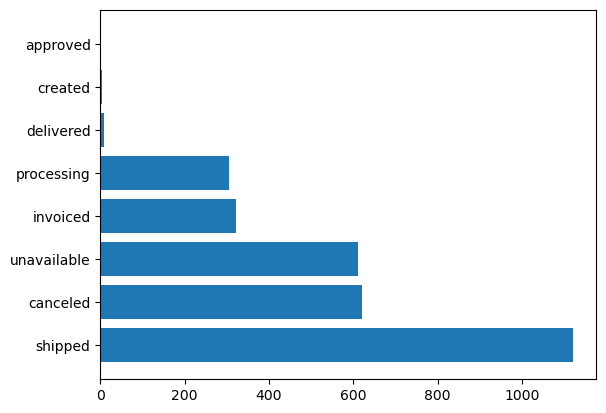

In [27]:
plt.barh(df_[np.isnan(df['order_delivered_customer_date'])]['order_status'].value_counts().index, df_[np.isnan(df['order_delivered_customer_date'])]['order_status'].value_counts().values)
plt.show()

dari rincian status order diatas, diketahui bahwa sedikit order yang statusnya ```delivered``` hanya 3. bisa dibilang ```order_delivered_carrier_date``` secara sistem tidak akan terupdate jika barang belum terdelivered.

In [22]:
df_.describe()

,price,freight_value
count,102392.000000,102392.000000
mean,124.519303,20.109279
std,188.772009,15.841742
min,0.850000,0.000000
25%,41.800000,13.220000
50%,78.000000,16.290000
75%,139.000000,21.190000
max,6735.000000,409.680000


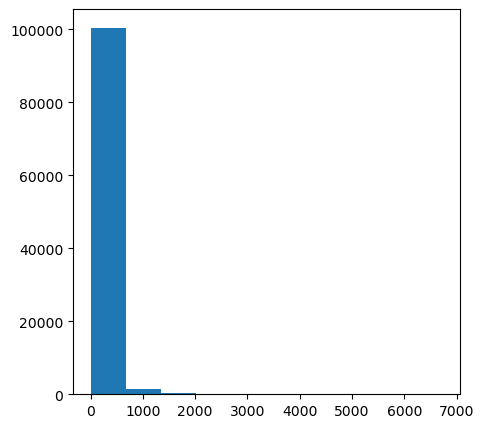

In [23]:
plt.figure(figsize=(5,5))
plt.hist(df_[['price']])
plt.show()

In [38]:
city_comparison = df_[df_['order_status'] == 'delivered']
city_comparison = city_comparison.groupby('customer_city').agg({'order_id':'count'}).sort_values('order_id',ascending=False).reset_index()
city_comparison.head()

,customer_city,order_id
0,sao paulo,15566
1,rio de janeiro,6778
2,belo horizonte,2781
3,brasilia,2133
4,curitiba,1522


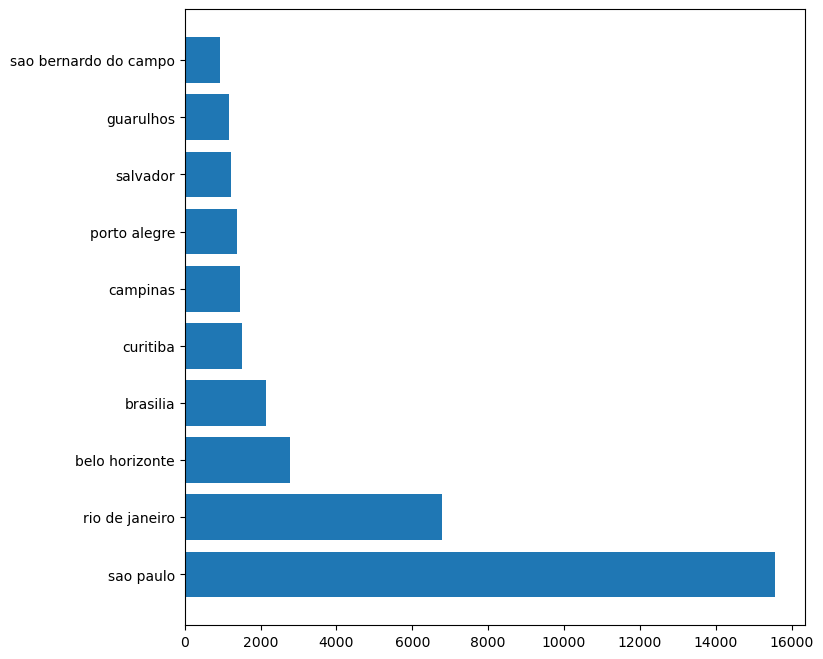

In [39]:
plt.figure(figsize=(8,8))
plt.barh(city_comparison['customer_city'][:10], city_comparison['order_id'][:10])
plt.show()

In [35]:
seller = df_.set_index('seller_id').join(df_sellers.set_index('seller_id')).reset_index().drop('index', axis=1)
seller

,seller_id,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,product_category_name,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,0015a82c2db000af6aaaf3ae2ecb0532,7f39ba4c9052be115350065d07583cac,delivered,2017-10-18 08:16:34,2017-10-18 23:56:20,2017-10-20 14:29:01,2017-10-27 16:46:05,2017-11-09,9de5797cddb92598755a0f76383ddbbb,entre rios de minas,MG,eletroportateis,895.00,21.02,9080.0,santo andre,SP
1,0015a82c2db000af6aaaf3ae2ecb0532,9dc8d1a6f16f1b89874c29c9d8d30447,delivered,2017-10-12 13:33:22,2017-10-12 13:49:22,2017-10-17 15:42:42,2017-10-24 20:17:44,2017-11-06,9915eb9f74b6c11aaf04833f65b00e93,paracatu,MG,eletroportateis,895.00,21.02,9080.0,santo andre,SP
2,0015a82c2db000af6aaaf3ae2ecb0532,d455a8cb295653b55abda06d434ab492,delivered,2017-09-26 22:17:05,2017-09-27 22:24:16,2017-09-29 15:53:03,2017-10-07 16:12:47,2017-10-30,3c7e305796add66698959fc7ad176f6b,umuarama,PR,eletroportateis,895.00,21.02,9080.0,santo andre,SP
3,001cca7ae9ae17fb1caed9dfb1094831,006e43460a55bc60c0a437521e426529,delivered,2017-05-11 00:24:35,2017-05-11 01:30:22,2017-05-12 12:26:32,2017-05-19 09:51:17,2017-06-02,1df0a296f852bdf1a17b085730f4b894,guaruja,SP,ferramentas_jardim,99.00,43.06,29156.0,cariacica,ES
4,001cca7ae9ae17fb1caed9dfb1094831,038345c4a9d21c17180f2f77e1701c69,delivered,2017-11-13 19:55:04,2017-11-13 20:08:11,2017-11-16 18:48:59,2018-01-25 12:59:42,2017-12-04,211973429b3ca75e0d50d81334502de4,sao paulo,SP,ferramentas_jardim,99.00,33.08,29156.0,cariacica,ES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102387,NaN,fdcca0e15a4d03e3fb89fb14664a3744,unavailable,2017-09-11 20:02:08,2017-09-11 20:15:25,NaT,NaT,2017-10-02,3ba7980dfa14cd3508fa58c4198ce202,valenca,RJ,NaN,74.99,16.26,NaN,NaN,NaN
102388,NaN,fddbd183387b5c9bcbafbd0fe965301f,unavailable,2017-09-23 10:25:00,2017-09-26 03:24:31,NaT,NaT,2017-10-18,ab1284d4947ed16ddcc55a7f06f13c63,curitiba,PR,NaN,74.99,16.26,NaN,NaN,NaN
102389,NaN,fe87d4b944748f63ca5ed22cc55b6fb6,unavailable,2017-12-05 09:20:36,2017-12-05 15:14:07,NaT,NaT,2017-12-21,876e013b5aba25a55b55a4d5670ba831,sao paulo,SP,NaN,74.99,16.26,NaN,NaN,NaN
102390,NaN,feae5ecdf2cc16c1007741be785fe3cd,unavailable,2017-11-11 16:41:06,2017-11-11 16:56:15,NaT,NaT,2017-11-27,7bc4575824e6804ddbe418bf4ad08079,embu das artes,SP,NaN,74.99,16.26,NaN,NaN,NaN


```seller_id``` yang Nan didominasi oleh ```order_status``` bernilai unavailable atau canceled. bisa dibilang kalau suatu order yang tidak memiliki seller id kemungkinan pesanan sedang bermasalah, kesalahan pengguna, atau adanya pembatalan baik dari sistem ataupun customer.

In [36]:
seller[seller['seller_id'].isna()]['order_status'].value_counts()

unavailable    603
canceled       164
created          5
invoiced         2
shipped          1
Name: order_status, dtype: int64

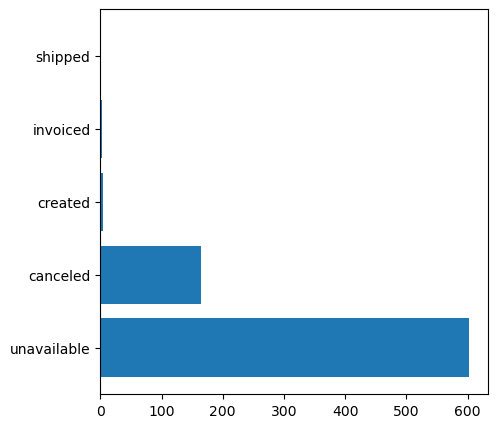

In [37]:
plt.figure(figsize=(5,5))
plt.barh(seller[seller['seller_id'].isna()]['order_status'].value_counts().index, seller[seller['seller_id'].isna()]['order_status'].value_counts().values)
plt.show()

In [38]:
seller_not_na = seller[seller['seller_id'].isna() == False]
seller_not_na.head()

,seller_id,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,product_category_name,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,0015a82c2db000af6aaaf3ae2ecb0532,7f39ba4c9052be115350065d07583cac,delivered,2017-10-18 08:16:34,2017-10-18 23:56:20,2017-10-20 14:29:01,2017-10-27 16:46:05,2017-11-09,9de5797cddb92598755a0f76383ddbbb,entre rios de minas,MG,eletroportateis,895.0,21.02,9080.0,santo andre,SP
1,0015a82c2db000af6aaaf3ae2ecb0532,9dc8d1a6f16f1b89874c29c9d8d30447,delivered,2017-10-12 13:33:22,2017-10-12 13:49:22,2017-10-17 15:42:42,2017-10-24 20:17:44,2017-11-06,9915eb9f74b6c11aaf04833f65b00e93,paracatu,MG,eletroportateis,895.0,21.02,9080.0,santo andre,SP
2,0015a82c2db000af6aaaf3ae2ecb0532,d455a8cb295653b55abda06d434ab492,delivered,2017-09-26 22:17:05,2017-09-27 22:24:16,2017-09-29 15:53:03,2017-10-07 16:12:47,2017-10-30,3c7e305796add66698959fc7ad176f6b,umuarama,PR,eletroportateis,895.0,21.02,9080.0,santo andre,SP
3,001cca7ae9ae17fb1caed9dfb1094831,006e43460a55bc60c0a437521e426529,delivered,2017-05-11 00:24:35,2017-05-11 01:30:22,2017-05-12 12:26:32,2017-05-19 09:51:17,2017-06-02,1df0a296f852bdf1a17b085730f4b894,guaruja,SP,ferramentas_jardim,99.0,43.06,29156.0,cariacica,ES
4,001cca7ae9ae17fb1caed9dfb1094831,038345c4a9d21c17180f2f77e1701c69,delivered,2017-11-13 19:55:04,2017-11-13 20:08:11,2017-11-16 18:48:59,2018-01-25 12:59:42,2017-12-04,211973429b3ca75e0d50d81334502de4,sao paulo,SP,ferramentas_jardim,99.0,33.08,29156.0,cariacica,ES


In [39]:
seller_not_na = seller_not_na[seller_not_na['order_status'] == 'delivered']
seller_not_na.head()

,seller_id,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,product_category_name,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,0015a82c2db000af6aaaf3ae2ecb0532,7f39ba4c9052be115350065d07583cac,delivered,2017-10-18 08:16:34,2017-10-18 23:56:20,2017-10-20 14:29:01,2017-10-27 16:46:05,2017-11-09,9de5797cddb92598755a0f76383ddbbb,entre rios de minas,MG,eletroportateis,895.0,21.02,9080.0,santo andre,SP
1,0015a82c2db000af6aaaf3ae2ecb0532,9dc8d1a6f16f1b89874c29c9d8d30447,delivered,2017-10-12 13:33:22,2017-10-12 13:49:22,2017-10-17 15:42:42,2017-10-24 20:17:44,2017-11-06,9915eb9f74b6c11aaf04833f65b00e93,paracatu,MG,eletroportateis,895.0,21.02,9080.0,santo andre,SP
2,0015a82c2db000af6aaaf3ae2ecb0532,d455a8cb295653b55abda06d434ab492,delivered,2017-09-26 22:17:05,2017-09-27 22:24:16,2017-09-29 15:53:03,2017-10-07 16:12:47,2017-10-30,3c7e305796add66698959fc7ad176f6b,umuarama,PR,eletroportateis,895.0,21.02,9080.0,santo andre,SP
3,001cca7ae9ae17fb1caed9dfb1094831,006e43460a55bc60c0a437521e426529,delivered,2017-05-11 00:24:35,2017-05-11 01:30:22,2017-05-12 12:26:32,2017-05-19 09:51:17,2017-06-02,1df0a296f852bdf1a17b085730f4b894,guaruja,SP,ferramentas_jardim,99.0,43.06,29156.0,cariacica,ES
4,001cca7ae9ae17fb1caed9dfb1094831,038345c4a9d21c17180f2f77e1701c69,delivered,2017-11-13 19:55:04,2017-11-13 20:08:11,2017-11-16 18:48:59,2018-01-25 12:59:42,2017-12-04,211973429b3ca75e0d50d81334502de4,sao paulo,SP,ferramentas_jardim,99.0,33.08,29156.0,cariacica,ES


In [40]:
seller_city_comparison = seller_not_na.groupby('seller_city').agg({'seller_id':'count'}).sort_values('seller_id',ascending=False).reset_index()
seller_city_comparison.head()

,seller_city,seller_id
0,sao paulo,24505
1,ibitinga,6856
2,curitiba,2713
3,santo andre,2651
4,belo horizonte,2373


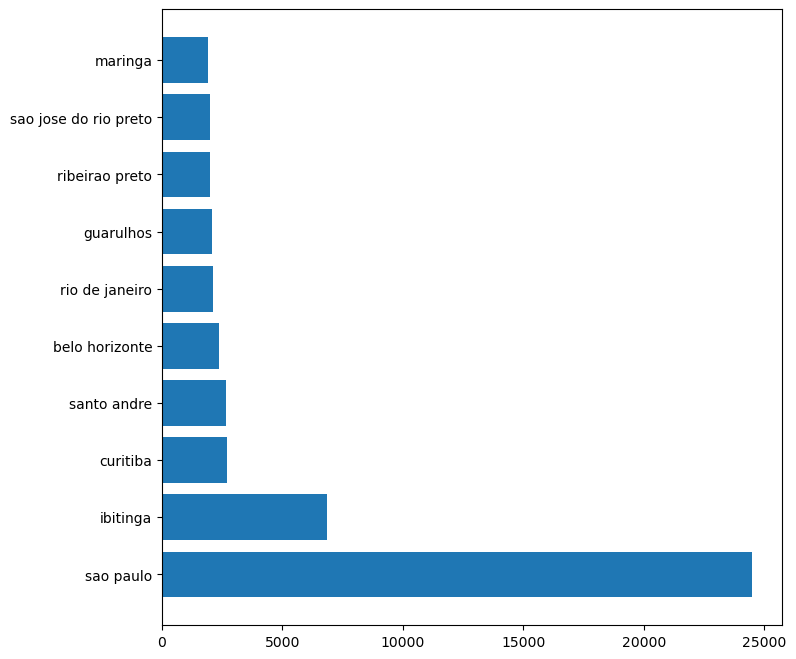

In [41]:
plt.figure(figsize=(8,8))
plt.barh(seller_city_comparison['seller_city'][:10], seller_city_comparison['seller_id'][:10])
plt.show()

In [42]:
seller_not_na.order_approved_at.min()

Timestamp('2016-09-15 12:16:38')

In [65]:
pd.pivot_table(seller_not_na, values=["price", "order_id"], index=['customer_city'], aggfunc={
    "price":"sum",
    "order_id":"count"
}).sort_values('price', ascending=False).reset_index()

,customer_city,order_id,price
0,sao paulo,15566,1730070.42
1,rio de janeiro,6778,879107.59
2,belo horizonte,2781,326368.25
3,brasilia,2133,280473.17
4,curitiba,1522,189212.43
...,...,...,...
4080,jenipapo de minas,1,7.48
4081,santo antonio do rio abaixo,1,6.00
4082,senador jose porfirio,1,6.00
4083,sabaudia,1,5.90


In [95]:
pd.pivot_table(seller_not_na, values=["price", "order_id"], index=['customer_city'], aggfunc={
    "price":"mean",
    "order_id":"count"
}).sort_values('price', ascending=False).reset_index()

,customer_city,order_id,price
0,pianco,1,2200.00
1,nova esperanca do piria,1,2199.00
2,engenheiro navarro,1,1997.00
3,agrestina,1,1989.00
4,mariental,1,1799.00
...,...,...,...
4080,jenipapo de minas,1,7.48
4081,senador jose porfirio,1,6.00
4082,santo antonio do rio abaixo,1,6.00
4083,sabaudia,1,5.90


In [66]:
seller_not_na.head()

,seller_id,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,product_category_name,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,0015a82c2db000af6aaaf3ae2ecb0532,7f39ba4c9052be115350065d07583cac,delivered,2017-10-18 08:16:34,2017-10-18 23:56:20,2017-10-20 14:29:01,2017-10-27 16:46:05,2017-11-09,9de5797cddb92598755a0f76383ddbbb,entre rios de minas,MG,eletroportateis,895.0,21.02,9080.0,santo andre,SP
1,0015a82c2db000af6aaaf3ae2ecb0532,9dc8d1a6f16f1b89874c29c9d8d30447,delivered,2017-10-12 13:33:22,2017-10-12 13:49:22,2017-10-17 15:42:42,2017-10-24 20:17:44,2017-11-06,9915eb9f74b6c11aaf04833f65b00e93,paracatu,MG,eletroportateis,895.0,21.02,9080.0,santo andre,SP
2,0015a82c2db000af6aaaf3ae2ecb0532,d455a8cb295653b55abda06d434ab492,delivered,2017-09-26 22:17:05,2017-09-27 22:24:16,2017-09-29 15:53:03,2017-10-07 16:12:47,2017-10-30,3c7e305796add66698959fc7ad176f6b,umuarama,PR,eletroportateis,895.0,21.02,9080.0,santo andre,SP
3,001cca7ae9ae17fb1caed9dfb1094831,006e43460a55bc60c0a437521e426529,delivered,2017-05-11 00:24:35,2017-05-11 01:30:22,2017-05-12 12:26:32,2017-05-19 09:51:17,2017-06-02,1df0a296f852bdf1a17b085730f4b894,guaruja,SP,ferramentas_jardim,99.0,43.06,29156.0,cariacica,ES
4,001cca7ae9ae17fb1caed9dfb1094831,038345c4a9d21c17180f2f77e1701c69,delivered,2017-11-13 19:55:04,2017-11-13 20:08:11,2017-11-16 18:48:59,2018-01-25 12:59:42,2017-12-04,211973429b3ca75e0d50d81334502de4,sao paulo,SP,ferramentas_jardim,99.0,33.08,29156.0,cariacica,ES


In [68]:
pd.pivot_table(seller_not_na, values=['price',"order_id"], index=['seller_city'],aggfunc={
    "price":"sum",
    "order_id":"count"
}).sort_values('price', ascending=False).reset_index()

,seller_city,order_id,price
0,sao paulo,24505,2427010.68
1,ibitinga,6856,567277.24
2,curitiba,2713,434336.09
3,rio de janeiro,2132,323123.15
4,guarulhos,2083,294348.04
...,...,...,...
590,oliveira,1,19.00
591,jarinu,1,14.63
592,macatuba,1,13.00
593,brotas,2,12.00


In [96]:
pd.pivot_table(seller_not_na, values=['price',"order_id"], index=['seller_city'],aggfunc={
    "price":"mean",
    "order_id":"count"
}).sort_values('price', ascending=False).reset_index()

,seller_city,order_id,price
0,bofete,3,3133.323333
1,california,6,1271.666667
2,paincandu,8,1228.493750
3,montes claros,4,941.000000
4,mamanguape,15,911.274000
...,...,...,...
590,jarinu,1,14.630000
591,macatuba,1,13.000000
592,palotina,1,9.990000
593,floranopolis,2,9.990000


In [65]:
seller_not_na.duplicated().sum()

0

In [79]:
seller_not_na

,seller_id,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,product_category_name,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,0015a82c2db000af6aaaf3ae2ecb0532,7f39ba4c9052be115350065d07583cac,delivered,2017-10-18 08:16:34,2017-10-18 23:56:20,2017-10-20 14:29:01,2017-10-27 16:46:05,2017-11-09,9de5797cddb92598755a0f76383ddbbb,entre rios de minas,MG,eletroportateis,895.0,21.02,9080.0,santo andre,SP
1,0015a82c2db000af6aaaf3ae2ecb0532,9dc8d1a6f16f1b89874c29c9d8d30447,delivered,2017-10-12 13:33:22,2017-10-12 13:49:22,2017-10-17 15:42:42,2017-10-24 20:17:44,2017-11-06,9915eb9f74b6c11aaf04833f65b00e93,paracatu,MG,eletroportateis,895.0,21.02,9080.0,santo andre,SP
2,0015a82c2db000af6aaaf3ae2ecb0532,d455a8cb295653b55abda06d434ab492,delivered,2017-09-26 22:17:05,2017-09-27 22:24:16,2017-09-29 15:53:03,2017-10-07 16:12:47,2017-10-30,3c7e305796add66698959fc7ad176f6b,umuarama,PR,eletroportateis,895.0,21.02,9080.0,santo andre,SP
3,001cca7ae9ae17fb1caed9dfb1094831,006e43460a55bc60c0a437521e426529,delivered,2017-05-11 00:24:35,2017-05-11 01:30:22,2017-05-12 12:26:32,2017-05-19 09:51:17,2017-06-02,1df0a296f852bdf1a17b085730f4b894,guaruja,SP,ferramentas_jardim,99.0,43.06,29156.0,cariacica,ES
4,001cca7ae9ae17fb1caed9dfb1094831,038345c4a9d21c17180f2f77e1701c69,delivered,2017-11-13 19:55:04,2017-11-13 20:08:11,2017-11-16 18:48:59,2018-01-25 12:59:42,2017-12-04,211973429b3ca75e0d50d81334502de4,sao paulo,SP,ferramentas_jardim,99.0,33.08,29156.0,cariacica,ES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101607,ffff564a4f9085cd26170f4732393726,81251f18621a822ad5b09593dfee4fc9,delivered,2017-01-21 14:17:21,2017-01-21 14:30:16,2017-01-25 16:51:53,2017-01-27 11:34:09,2017-03-16,f992b70fb02cdfadc277f493997515b7,porto ferreira,SP,eletronicos,11.5,10.96,13070.0,campinas,SP
101611,ffff564a4f9085cd26170f4732393726,fdb3ef83ea6f7bef7d13bdd9b38da661,delivered,2017-01-17 21:09:40,2017-01-17 21:21:39,2017-01-24 14:49:32,2017-01-26 16:25:11,2017-03-13,e03a1bf47d42257f8e8e5e8775696622,embu-guacu,SP,automotivo,109.2,13.34,13070.0,campinas,SP
101612,ffff564a4f9085cd26170f4732393726,616b813dbea8acc9de0ca0380cd89b83,delivered,2017-01-16 19:04:32,2017-01-16 19:10:16,2017-01-20 15:18:08,2017-01-30 15:41:52,2017-03-20,c5cf9357698d4fbca794731fe22b1606,porto alegre,RS,automotivo,29.4,16.05,13070.0,campinas,SP
101613,ffff564a4f9085cd26170f4732393726,df537c849af44beef86a7ef7de12126a,delivered,2017-01-19 21:48:41,2017-01-19 22:01:56,2017-01-25 16:05:15,2017-01-30 11:41:52,2017-03-15,051bc94e9cd865806bba8eeefb336d0a,cesario lange,SP,automotivo,29.4,10.96,13070.0,campinas,SP


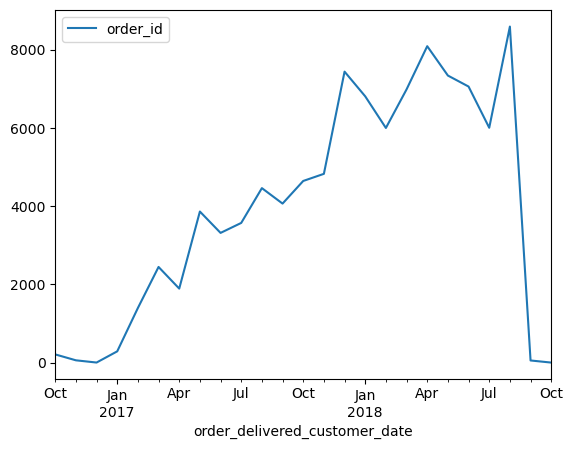

In [93]:
seller_not_na.set_index('order_delivered_customer_date').groupby(pd.Grouper(freq='M')).agg({'order_id':'count'}).plot(kind='line')
plt.show()

## Jarak antara ```order_estimated_delivery_date``` dengan ```order_delivered_customer_date```

In [98]:
seller_not_na['month_diff'] = seller_not_na['order_estimated_delivery_date'].dt.date - seller_not_na['order_delivered_customer_date'].dt.date
seller_not_na

,seller_id,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,product_category_name,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,month_diff
0,0015a82c2db000af6aaaf3ae2ecb0532,7f39ba4c9052be115350065d07583cac,delivered,2017-10-18 08:16:34,2017-10-18 23:56:20,2017-10-20 14:29:01,2017-10-27 16:46:05,2017-11-09,9de5797cddb92598755a0f76383ddbbb,entre rios de minas,MG,eletroportateis,895.0,21.02,9080.0,santo andre,SP,13 days
1,0015a82c2db000af6aaaf3ae2ecb0532,9dc8d1a6f16f1b89874c29c9d8d30447,delivered,2017-10-12 13:33:22,2017-10-12 13:49:22,2017-10-17 15:42:42,2017-10-24 20:17:44,2017-11-06,9915eb9f74b6c11aaf04833f65b00e93,paracatu,MG,eletroportateis,895.0,21.02,9080.0,santo andre,SP,13 days
2,0015a82c2db000af6aaaf3ae2ecb0532,d455a8cb295653b55abda06d434ab492,delivered,2017-09-26 22:17:05,2017-09-27 22:24:16,2017-09-29 15:53:03,2017-10-07 16:12:47,2017-10-30,3c7e305796add66698959fc7ad176f6b,umuarama,PR,eletroportateis,895.0,21.02,9080.0,santo andre,SP,23 days
3,001cca7ae9ae17fb1caed9dfb1094831,006e43460a55bc60c0a437521e426529,delivered,2017-05-11 00:24:35,2017-05-11 01:30:22,2017-05-12 12:26:32,2017-05-19 09:51:17,2017-06-02,1df0a296f852bdf1a17b085730f4b894,guaruja,SP,ferramentas_jardim,99.0,43.06,29156.0,cariacica,ES,14 days
4,001cca7ae9ae17fb1caed9dfb1094831,038345c4a9d21c17180f2f77e1701c69,delivered,2017-11-13 19:55:04,2017-11-13 20:08:11,2017-11-16 18:48:59,2018-01-25 12:59:42,2017-12-04,211973429b3ca75e0d50d81334502de4,sao paulo,SP,ferramentas_jardim,99.0,33.08,29156.0,cariacica,ES,-52 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101607,ffff564a4f9085cd26170f4732393726,81251f18621a822ad5b09593dfee4fc9,delivered,2017-01-21 14:17:21,2017-01-21 14:30:16,2017-01-25 16:51:53,2017-01-27 11:34:09,2017-03-16,f992b70fb02cdfadc277f493997515b7,porto ferreira,SP,eletronicos,11.5,10.96,13070.0,campinas,SP,48 days
101611,ffff564a4f9085cd26170f4732393726,fdb3ef83ea6f7bef7d13bdd9b38da661,delivered,2017-01-17 21:09:40,2017-01-17 21:21:39,2017-01-24 14:49:32,2017-01-26 16:25:11,2017-03-13,e03a1bf47d42257f8e8e5e8775696622,embu-guacu,SP,automotivo,109.2,13.34,13070.0,campinas,SP,46 days
101612,ffff564a4f9085cd26170f4732393726,616b813dbea8acc9de0ca0380cd89b83,delivered,2017-01-16 19:04:32,2017-01-16 19:10:16,2017-01-20 15:18:08,2017-01-30 15:41:52,2017-03-20,c5cf9357698d4fbca794731fe22b1606,porto alegre,RS,automotivo,29.4,16.05,13070.0,campinas,SP,49 days
101613,ffff564a4f9085cd26170f4732393726,df537c849af44beef86a7ef7de12126a,delivered,2017-01-19 21:48:41,2017-01-19 22:01:56,2017-01-25 16:05:15,2017-01-30 11:41:52,2017-03-15,051bc94e9cd865806bba8eeefb336d0a,cesario lange,SP,automotivo,29.4,10.96,13070.0,campinas,SP,44 days


In [108]:
seller_not_na.groupby('customer_city').agg({'month_diff':'mean', 'order_id':'count'}).sort_values('order_id', ascending=False)

,month_diff,order_id
customer_city,,
sao paulo,10 days 19:05:27.020429140,15566
rio de janeiro,13 days 06:51:31.177338448,6778
belo horizonte,12 days 16:08:17.087378640,2781
brasilia,12 days 03:59:39.746835443,2133
curitiba,13 days 13:08:07.253613666,1522
...,...,...
centro novo do maranhao,5 days 00:00:00,1
santa amelia,6 days 00:00:00,1
cerejeiras,24 days 00:00:00,1


```order_estimated_delivery_date``` diartikan untuk menunjukkan perkiraan tanggal pengiriman yang diinformasikan kepada pelanggan pada saat pembelian. Sedang ```order_delivered_customer_date``` menunjukkan tanggal pengiriman pesanan yang sebenarnya kepada pelanggan. 

Dilihat dari data diatas yang diahsilkan dari pengurangan ```order_estimated_delivery_date``` dengan ```order_delivered_customer_date```. Sao paulo dengan rataan order serta pendapatan tertinggi memiliki perbedaan jarak hari antara ```order_estimated_delivery_date``` dengan ```order_delivered_customer_date``` sebesar 10 hari 19 jam. Namun terdapat beberapa wilayah yang memiliki jarak minus. bisa dibilang masih banyak daerah yang memiliki pengiriman tidak tepat waktu.

## Performa kesiapan barang untuk siap diantar

In [70]:
seller_not_na['ready_to_ship_month_diff'] = seller_not_na['order_delivered_carrier_date'].dt.date - seller_not_na['order_approved_at'].dt.date
seller_not_na.head()

,seller_id,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,product_category_name,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,ready_to_ship_month_diff
0,0015a82c2db000af6aaaf3ae2ecb0532,7f39ba4c9052be115350065d07583cac,delivered,2017-10-18 08:16:34,2017-10-18 23:56:20,2017-10-20 14:29:01,2017-10-27 16:46:05,2017-11-09,9de5797cddb92598755a0f76383ddbbb,entre rios de minas,MG,eletroportateis,895.0,21.02,9080.0,santo andre,SP,2 days
1,0015a82c2db000af6aaaf3ae2ecb0532,9dc8d1a6f16f1b89874c29c9d8d30447,delivered,2017-10-12 13:33:22,2017-10-12 13:49:22,2017-10-17 15:42:42,2017-10-24 20:17:44,2017-11-06,9915eb9f74b6c11aaf04833f65b00e93,paracatu,MG,eletroportateis,895.0,21.02,9080.0,santo andre,SP,5 days
2,0015a82c2db000af6aaaf3ae2ecb0532,d455a8cb295653b55abda06d434ab492,delivered,2017-09-26 22:17:05,2017-09-27 22:24:16,2017-09-29 15:53:03,2017-10-07 16:12:47,2017-10-30,3c7e305796add66698959fc7ad176f6b,umuarama,PR,eletroportateis,895.0,21.02,9080.0,santo andre,SP,2 days
3,001cca7ae9ae17fb1caed9dfb1094831,006e43460a55bc60c0a437521e426529,delivered,2017-05-11 00:24:35,2017-05-11 01:30:22,2017-05-12 12:26:32,2017-05-19 09:51:17,2017-06-02,1df0a296f852bdf1a17b085730f4b894,guaruja,SP,ferramentas_jardim,99.0,43.06,29156.0,cariacica,ES,1 days
4,001cca7ae9ae17fb1caed9dfb1094831,038345c4a9d21c17180f2f77e1701c69,delivered,2017-11-13 19:55:04,2017-11-13 20:08:11,2017-11-16 18:48:59,2018-01-25 12:59:42,2017-12-04,211973429b3ca75e0d50d81334502de4,sao paulo,SP,ferramentas_jardim,99.0,33.08,29156.0,cariacica,ES,3 days


In [72]:
seller_not_na.groupby('customer_city').agg({'ready_to_ship_month_diff':'mean', 'order_id':'count'}).sort_values('order_id', ascending=False).reset_index()['ready_to_ship_month_diff'].mean()

Timedelta('2 days 16:15:28.769798814')

In [77]:
df_['product_category_name'].fillna('UNKNOWN', inplace=True).isna().sum()
df_['seller_id'].fillna('UNKNOWN', inplace=True)

0

In [79]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102392 entries, 0 to 113424
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       102392 non-null  object        
 1   order_status                   102392 non-null  object        
 2   order_purchase_timestamp       102392 non-null  datetime64[ns]
 3   order_approved_at              102232 non-null  datetime64[ns]
 4   order_delivered_carrier_date   100594 non-null  datetime64[ns]
 5   order_delivered_customer_date  99399 non-null   datetime64[ns]
 6   order_estimated_delivery_date  102392 non-null  datetime64[ns]
 7   seller_id                      102392 non-null  object        
 8   customer_unique_id             102392 non-null  object        
 9   customer_city                  102392 non-null  object        
 10  customer_state                 102392 non-null  object        
 11  

# Outlier Handling

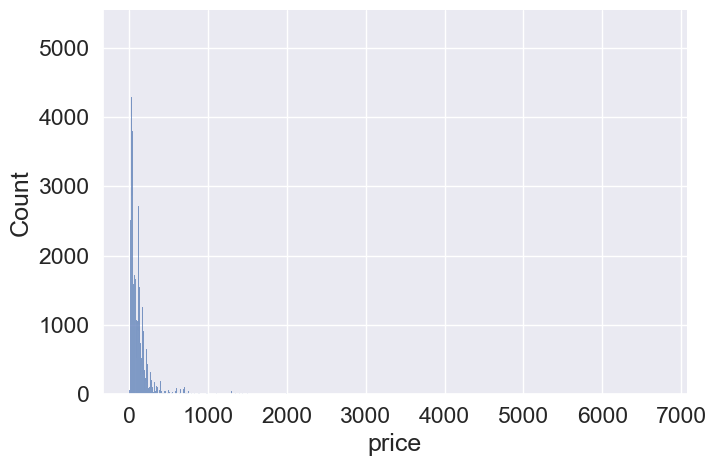

In [84]:
sns.displot(data=df_, x="price", kind="hist", aspect=1.5)
plt.show()

In [89]:
df_.describe()

,price,freight_value
count,102392.000000,102392.000000
mean,124.519303,20.109279
std,188.772009,15.841742
min,0.850000,0.000000
25%,41.800000,13.220000
50%,78.000000,16.290000
75%,139.000000,21.190000
max,6735.000000,409.680000


C:\Users\asus\AppData\Local\Temp\ipykernel_30808\2462311299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_.loc[:,"log_price"] = np.log(df_.loc[:,"price"])


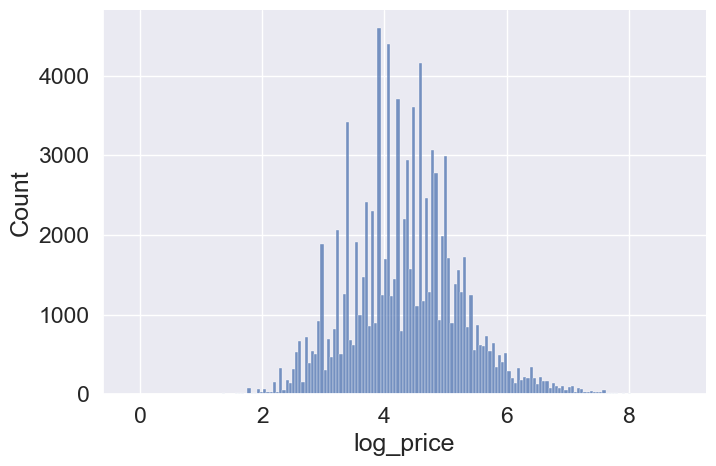

In [92]:
df_ = df_[df_.price!=78]
df_.loc[:,"log_price"] = np.log(df_.loc[:,"price"])
sns.displot(data=df_, x="log_price", kind="hist", aspect=1.5)